___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Deep Learning - Convolutional Neural Networks


This notebook introduces general CNN model with PyTorch https://pytorch.org on example of MNIST data set. 
    

### PyTorch installation

`pip install torch`
`pip install torchvision`

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in transformation and loading of dataset.

In [1]:
# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch imports 
import torch
import torch.nn as nn # Neural Network class
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
print(torch.__version__)
print(torchvision.__version__)

1.13.0
0.14.0


### PyTorch CNN

#### Main steps in the modelling process 
1. Load dataset
2. Make dataset iterable
3. Create model class
4. Instantiate model class
5. Instantiate loss class
6. Instantiate optimizer class
7. Train model

In [3]:
# Step 1: Load MNIST Dataset 

# old way 
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz

In [4]:
# old PyTorch way
# from torchvision.datasets import MNIST
# transform = transforms.Compose([transforms.ToTensor()])
# train_data = MNIST(root = './MNIST', train=True, download=False, transform=transform)
# val_data = MNIST(root = './MNIST', train=False, download=False, transform=transform)

In [8]:
# This step takes wile, depends on internet connection
# Irt will download locally the MNIST tran and test datasets from http://yann.lecun.com/exdb/mnist  
train_dataset = dsets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [9]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


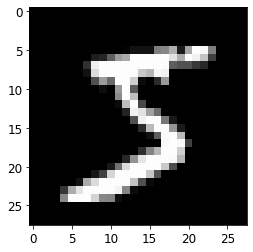

In [13]:
train_dataset_array = next(iter(train_dataset))[0].numpy()
# train_dataset_array.shape
plt.imshow(train_dataset_array[0,:,:], cmap='gray', interpolation='none')

In [14]:
next(iter(train_dataset.train_labels)).numpy()

array(5)

In [15]:
# Step 2: Make it iterable """

batch_size = 100
n_iters = 3000 
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

In [18]:
print(len(train_dataset))
print(batch_size)
print(num_epochs)

60000
100
5


In [20]:
# Step 3: Create Model Class

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(16 * 7 * 7, 10)


    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2 ( out )

        # Resize
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out


In [22]:
# Step 4: Instantiate Model Class

model = CNNModel()

In [25]:
# list(model.parameters())

In [ ]:
# PARAMETERS 
# print(model.parameters())
# print(len(list(model.parameters())))

# Convolution 1: 16 kernels
# print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 kernels
# print(list(model.parameters())[1].size())

# Convolution 2: 16 kernels
# print(list(model.parameters())[2].size())

# Convolution 2 Bias: 16 kernels
# print(list(model.parameters())[3].size())

# Fully connected layer
# print(list(model.parameters())[4].size())

# Fully connected layer Bias
# print(list(model.parameters())[5].size())

In [26]:
# Step 5: Initiate Loss Class

# CNN: Cross Entropy Loss
criterion = nn.CrossEntropyLoss() 

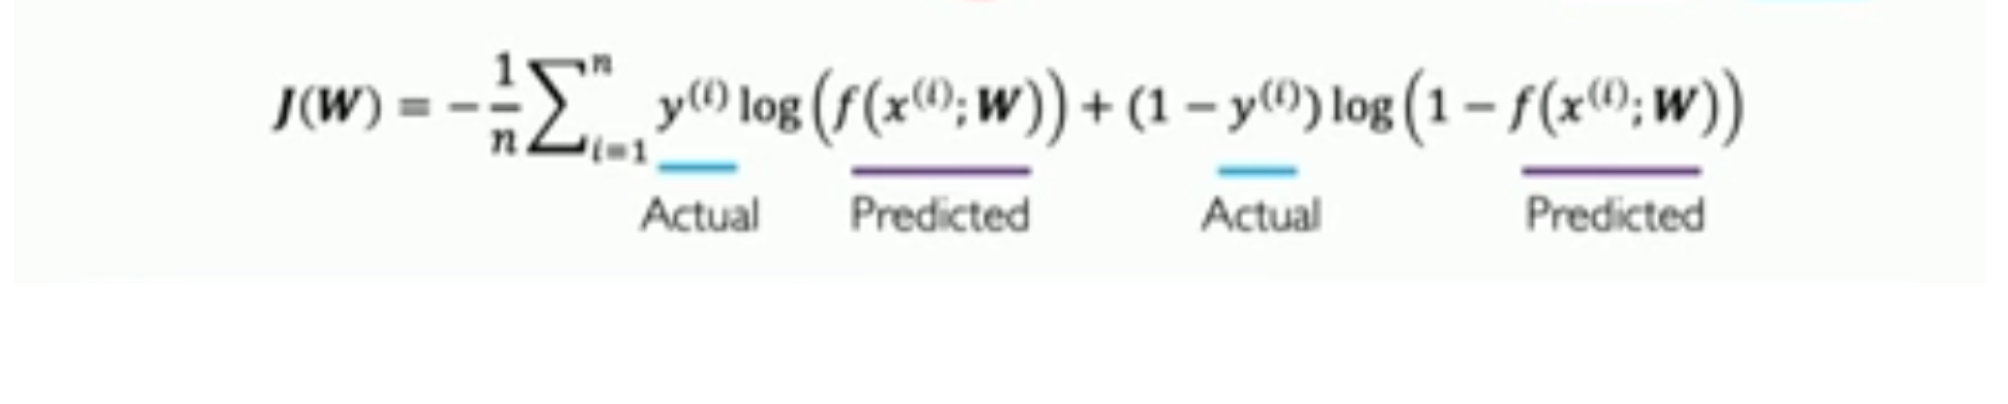

In [ ]:
# Step 6: Instantiate Optimizer Class

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
# Step 7: Train Model

loss_history = [] 
accuracy_history = [] 

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load images as Variables
        images = Variable(images) # X
        labels = Variable(labels) # y 

        # clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # forward pass to get output 
        outputs = model(images)
        
        # calculate cross entropy loss
        loss = criterion(outputs, labels)

        # getting gradients w.r.t. parameters
        loss.backward()
        
        # updating parameters
        optimizer.step()
        iter += 1

        if iter % 500 == 0:
            # Calculate accuracy
            correct = 0
            total = 0
            # iterate through test data set
            for images, labels in test_loader:
                # load images to a Torch Variable
                images = Variable(images)

                # forward pass only to get output
                outputs = model(images)
                # get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                # total number of labels
                total += labels.size(0)
                # total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # print loss
            # loss.data[0] X loss.item()
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.043440353125333786. Accuracy: 97.2300033569336
Iteration: 1000. Loss: 0.08417075872421265. Accuracy: 97.77999877929688
Iteration: 1500. Loss: 0.02907138131558895. Accuracy: 98.54000091552734
Iteration: 2000. Loss: 0.0682063177227974. Accuracy: 98.58000183105469
Iteration: 2500. Loss: 0.054335854947566986. Accuracy: 98.43000030517578
Iteration: 3000. Loss: 0.03270881250500679. Accuracy: 98.5999984741211


In [ ]:
# Task 1: add code to store and plot the loss and accuracy history
# Task 2: inscrease number of epoches (iterations) to see possible progress of the model beyond the 3000 iterations